# Default Rate vs Income by State

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
filename="../../Data/Geographic Analysis/default_rates_vs_income.csv"
df = pd.read_csv(filename)
df

,city,total_loans,avg_income,default_rate,loan_risk_score,loan_amount
0,Swansea,1810,"$65,307.00",0.204,0.388,16886800
1,Quebec City,1754,"$65,909.00",0.205,0.389,16749975
2,Buffalo,1796,"$65,876.00",0.205,0.386,17344825
3,Victoria,1852,"$64,440.00",0.208,0.391,17782675
4,Houston,1811,"$69,028.00",0.209,0.388,17663450
5,London,1851,"$67,033.00",0.211,0.385,17720125
6,Cardiff,1831,"$66,732.00",0.213,0.389,17409600
7,New York City,1769,"$67,941.00",0.214,0.388,16965075
8,Glasgow,1841,"$65,621.00",0.216,0.386,17340075
9,Ottawa,1802,"$66,259.00",0.218,0.393,17325050


In [38]:
df['avg_income'] = df['avg_income'].replace('[\$,]', '', regex=True).astype(float)

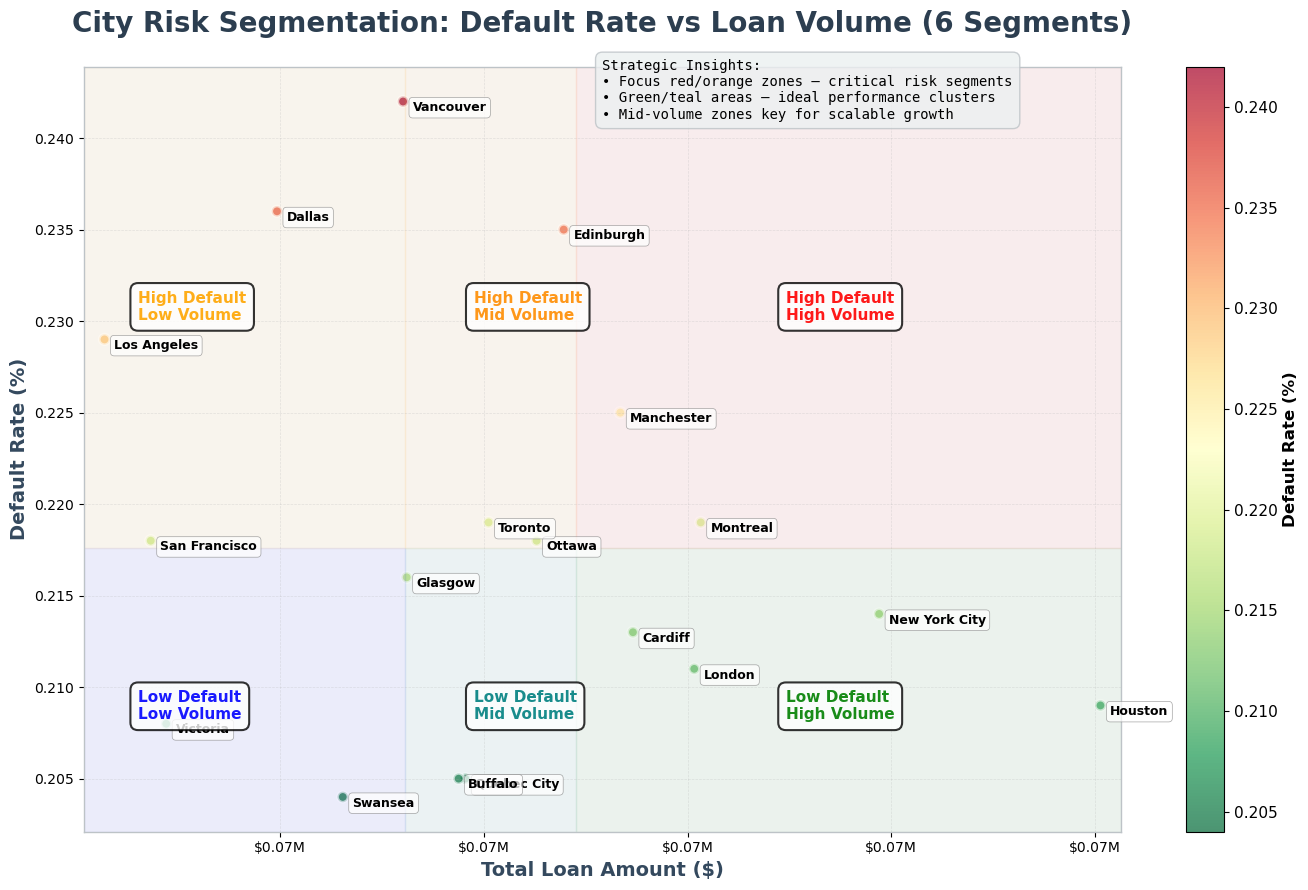

In [46]:
from matplotlib.ticker import FuncFormatter
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')

fig, ax = plt.subplots(figsize=(14, 9))

# Calculate cut points for segmentation
low_cut = df['avg_income'].quantile(0.33)
high_cut = df['avg_income'].quantile(0.66)
mean_default = df['default_rate'].mean()

# Scatter plot
scatter = ax.scatter(df['avg_income'], 
                     df['default_rate'],
                     s=df['loan_risk_score'] * 150,  # Scale for visibility
                     alpha=0.7,
                     c=df['default_rate'],
                     cmap='RdYlGn_r',
                     edgecolors='white',
                     linewidth=2)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Default Rate (%)', fontsize=12, fontweight='bold')
cbar.ax.tick_params(labelsize=11)

# Annotate points
for idx, row in df.iterrows():
    ax.annotate(row['city'], 
                (row['avg_income'], row['default_rate']),
                fontsize=9,
                fontweight='bold',
                xytext=(7, -7),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', 
                         facecolor='white', alpha=0.7, edgecolor='gray', linewidth=0.5))

# Title and labels
ax.set_title('City Risk Segmentation: Default Rate vs Loan Volume (6 Segments)', 
             fontsize=20, fontweight='bold', pad=25, color='#2c3e50')
ax.set_xlabel('Total Loan Amount ($)', fontsize=14, fontweight='bold', color='#34495e')
ax.set_ylabel('Default Rate (%)', fontsize=14, fontweight='bold', color='#34495e')
ax.set_xlim(df['avg_income'].min() - 100, df['avg_income'].max() + 100)
# Format x-axis
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x/1e6:.2f}M'))

# Add shaded areas for 6 segments
x_min, x_max = df['avg_income'].min(), df['avg_income'].max()
y_min, y_max = df['default_rate'].min(), df['default_rate'].max()

# Low default regions
ax.axvspan(df['avg_income'].min() - 100, low_cut, ymin=0, ymax=(mean_default - y_min) / (y_max - y_min), color='blue', alpha=0.05)
ax.axvspan(low_cut, high_cut, ymin=0, ymax=(mean_default - y_min) / (y_max - y_min), color='teal', alpha=0.05)
ax.axvspan(high_cut, x_max + 100, ymin=0, ymax=(mean_default - y_min) / (y_max - y_min), color='green', alpha=0.05)

# High default regions
ax.axvspan(df['avg_income'].min() - 100, low_cut, ymin=(mean_default - y_min) / (y_max - y_min), ymax=1, color='orange', alpha=0.05)
ax.axvspan(low_cut, high_cut, ymin=(mean_default - y_min) / (y_max - y_min), ymax=1, color='darkorange', alpha=0.05)
ax.axvspan(high_cut, x_max + 100, ymin=(mean_default - y_min) / (y_max - y_min), ymax=1, color='red', alpha=0.05)

# Add labels for 6 segments
quad_style = dict(fontsize=11, weight='bold', alpha=0.9,
                  bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8, edgecolor='black', linewidth=1.5))

# High default (top row)
ax.text(low_cut * 0.98, mean_default + (y_max - mean_default) * 0.5, "High Default\nLow Volume", color='orange', **quad_style)
ax.text(low_cut + (high_cut - low_cut) * 0.4, mean_default + (y_max - mean_default) * 0.5, "High Default\nMid Volume", color='darkorange', **quad_style)
ax.text(high_cut + (x_max - high_cut) * 0.4, mean_default + (y_max - mean_default) * 0.5, "High Default\nHigh Volume", color='red', **quad_style)

# Low default (bottom row)
ax.text(low_cut * 0.98, y_min + (mean_default - y_min) * 0.3, "Low Default\nLow Volume", color='blue', **quad_style)
ax.text(low_cut + (high_cut - low_cut) * 0.4, y_min + (mean_default - y_min) * 0.3, "Low Default\nMid Volume", color='teal', **quad_style)
ax.text(high_cut + (x_max - high_cut) * 0.4, y_min + (mean_default - y_min) * 0.3, "Low Default\nHigh Volume", color='green', **quad_style)

# Grid & styling
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_facecolor('#f8f9fa')

for spine in ax.spines.values():
    spine.set_linewidth(1)
    spine.set_color('#bdc3c7')

# Add key insights box
textstr = '''Strategic Insights:
• Focus red/orange zones – critical risk segments
• Green/teal areas – ideal performance clusters
• Mid-volume zones key for scalable growth'''

props = dict(boxstyle='round,pad=0.5', facecolor='#ecf0f1', 
             alpha=0.8, edgecolor='#bdc3c7')
ax.text(0.5, 1.01, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props, family='monospace')

plt.tight_layout()
plt.savefig('city_risk_analysis_6segments.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()


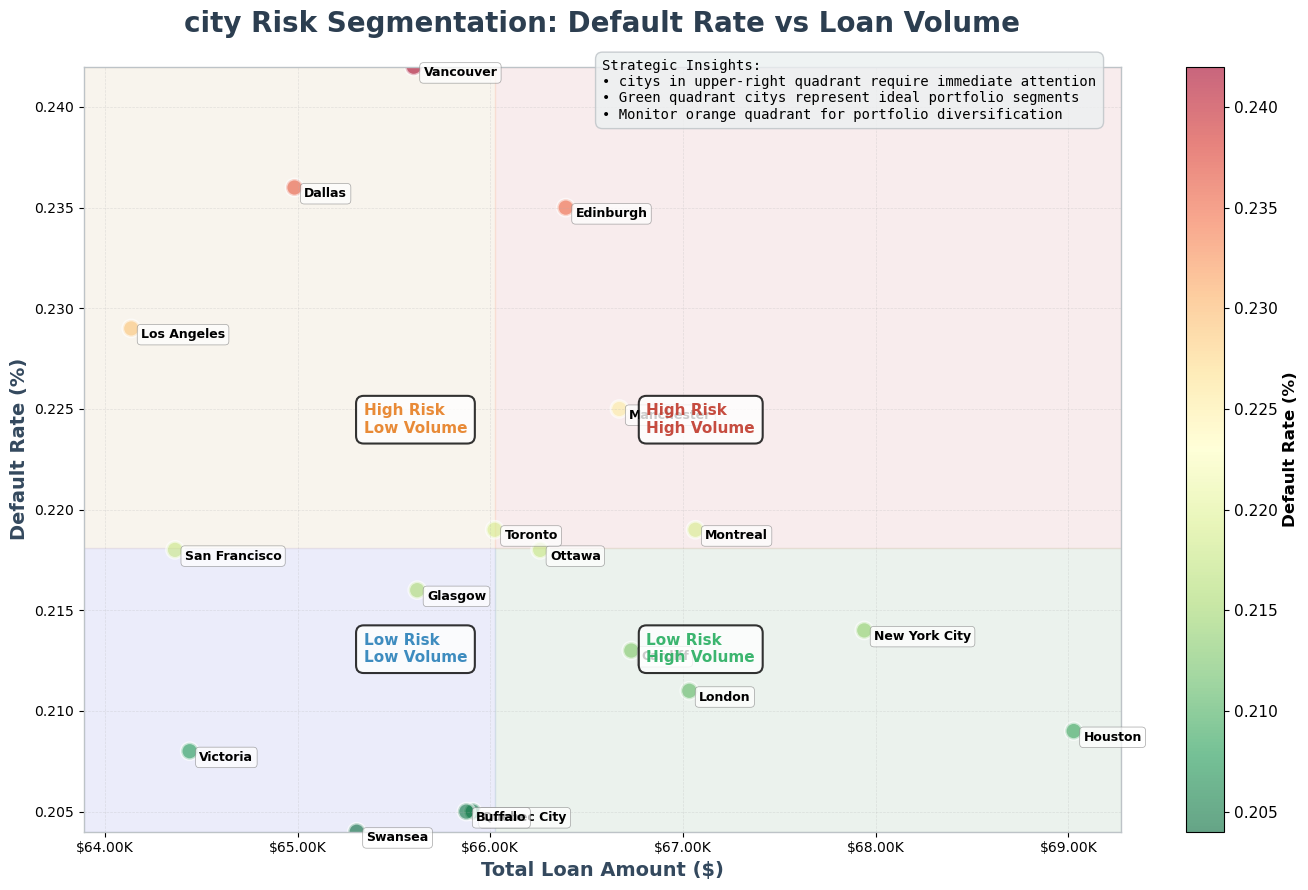

In [52]:
from matplotlib.ticker import FuncFormatter

# Set up professional styling
plt.style.use('default')

# Create figure
fig, ax = plt.subplots(figsize=(14, 9))

# Calculate means for segmentation
mean_loan = df['avg_income'].mean()
mean_default = df['default_rate'].mean()

# Create scatter plot with professional styling
scatter = ax.scatter(df['avg_income'], 
                     df['default_rate'],
                     s=150,  # Larger points
                     alpha=0.6,
                     c=df['default_rate'],
                     cmap='RdYlGn_r',
                     edgecolors='white',
                     linewidth=2)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Default Rate (%)', fontsize=12, fontweight='bold')
cbar.ax.tick_params(labelsize=11)

# Annotate each point with state name
for idx, row in df.iterrows():
    ax.annotate(row['city'], 
                (row['avg_income'], row['default_rate']),
                fontsize=9,
                fontweight='bold',
                xytext=(7, -7),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', 
                         facecolor='white', 
                         alpha=0.7,
                         edgecolor='gray',
                         linewidth=0.5))



# Professional title and labels
ax.set_title('city Risk Segmentation: Default Rate vs Loan Volume', 
             fontsize=20, fontweight='bold', pad=25, color='#2c3e50')
ax.set_xlabel('Total Loan Amount ($)', fontsize=14, fontweight='bold', color='#34495e')
ax.set_ylabel('Default Rate (%)', fontsize=14, fontweight='bold', color='#34495e')
ax.set_ylim(df['default_rate'].min(), df['default_rate'].max())

# Format x-axis to show currency in millions
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x/1e3:.2f}K'))

# Add quadrant labels with better positioning and styling
quadrant_style = dict(fontsize=11, weight='bold', alpha=0.9,
                     bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                              alpha=0.8, edgecolor='black', linewidth=1.5))

# Calculate better positions for quadrant labels
x_range = df['avg_income'].max() - df['avg_income'].min()
y_range = df['default_rate'].max() - df['default_rate'].min()

ax.text(mean_loan + x_range * 0.15, mean_default + y_range * 0.15, 
        'High Risk\nHigh Volume', color='#c0392b', **quadrant_style)
ax.text(mean_loan + x_range * 0.15, mean_default - y_range * 0.15, 
        'Low Risk\nHigh Volume', color='#27ae60', **quadrant_style)
ax.text(mean_loan - x_range * 0.15, mean_default + y_range * 0.15, 
        'High Risk\nLow Volume', color='#e67e22', **quadrant_style)
ax.text(mean_loan - x_range * 0.15, mean_default - y_range * 0.15, 
        'Low Risk\nLow Volume', color='#2980b9', **quadrant_style)


# Calculate proper xmin/xmax based on actual data range
x_min = df['avg_income'].min()
x_max = df['avg_income'].max()
x_mid_norm = (mean_loan - x_min) / (x_max - x_min)

# High default rate quadrants (top half)
ax.axhspan(mean_default, df['default_rate'].max(), 
           xmin=0, xmax=x_mid_norm, alpha=0.05, color='orange', zorder=0)
ax.axhspan(mean_default, df['default_rate'].max(), 
           xmin=x_mid_norm, xmax=1, alpha=0.05, color='red', zorder=0)

# Low default rate quadrants (bottom half)
ax.axhspan(df['default_rate'].min(), mean_default, 
           xmin=0, xmax=x_mid_norm, alpha=0.05, color='blue', zorder=0)
ax.axhspan(df['default_rate'].min(), mean_default, 
           xmin=x_mid_norm, xmax=1, alpha=0.05, color='green', zorder=0)

# Professional styling
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_facecolor('#f8f9fa')

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_color('#bdc3c7')

# # Legend with professional styling
# legend = ax.legend(loc='upper left', fontsize=11, framealpha=0.9, 
#                    edgecolor='#bdc3c7', fancybox=True)
# legend.get_frame().set_linewidth(1.5)

# Add key insights box
textstr = '''Strategic Insights:
• citys in upper-right quadrant require immediate attention
• Green quadrant citys represent ideal portfolio segments
• Monitor orange quadrant for portfolio diversification'''

props = dict(boxstyle='round,pad=0.5', facecolor='#ecf0f1', 
             alpha=0.8, edgecolor='#bdc3c7')
ax.text(0.5, 1.01, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props, family='monospace')

# Adjust layout
plt.tight_layout()

# Save high-quality image
plt.savefig('city_risk_analysis.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

plt.show()